<h1 style="color:blue;"><center style="font-size:40px;">InstaBot - II </h1>

<h3> <strong> In this notebook I have done a survey on "FOOD" handles of Instagram by web scraping using Selenium. 
Same code can be be applied for other content/topics </strong> </h3>

(Change the search handle in 1.1 for results on other desired topics) 

To use some other functionalities of this Bot refer to <strong style="color:blue;"> InstaBot-I</strong> notebook.
 


<strong><ul>Instructions:</strong>
    <li>Enter your Username and Password in 'Log in Instagram' section.</li>
    <li>Please run the codes in sequence as given, as some functions are dependent.</li>
    <li>Incase you feel the site has stopped processing the code, please have some patience as some components take time to load and code has been accordingly written to handle it. </li>


### Creating a web driver session 

In [13]:
#importing selenium libraries
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
import time

driver = webdriver.Chrome(executable_path = 'D:\Coding Ninja\Data science & Machine Learning/chromedriver')

## Log in Instagram

In [2]:
def login(user,password):
    driver.get('https://www.instagram.com/?hl=en')
    time.sleep(5)
    assert 'Instagram' in driver.title
    us=driver.find_element_by_name("username")
    us.send_keys(user)
    ps=driver.find_element_by_name("password")
    ps.send_keys(password)
    bt=driver.find_element_by_xpath("//button[contains(@class,'y3zKF')]")
    bt.submit()
    time.sleep(5)

In [3]:
#run this if you have set up two factor authentication

def verification(x):
    sc=driver.find_element_by_name("verificationCode")
    sc.send_keys(x)
    bt=driver.find_element_by_xpath("//button[contains(@class,'y3zKF')]")
    bt.submit()
    time.sleep(5)

In [83]:
def login_process():   
    try :
        #dont save information
        bt=driver.find_element_by_xpath("//button[contains(@class,'sqdOP yWX7d    y3zKF     ')]")
        bt.click()
    except NoSuchElementException:
        pass
     
        
    try:
        # dont turn on notification
        bt=driver.find_element_by_xpath("//button[contains(@class,'aOOlW   HoLwm ')]")
        bt.click() 
    except NoSuchElementException:
        pass    

In [82]:
#Enter your instagram username and password inplace of sample username and sample password
login("SAMPLE USERNAME","SAMPLE PASSWORD")

In [84]:
#run this if you have set up two factor authentication for your account
#enter the verification code recieved on your phone

verification("987654")

In [7]:
#for not saving info and turning off notifications
login_process()

# 1.1 Exracting top 5 handles with highest followers

### Search 

In [3]:
#gives a list of first ten instagram handles  on searching
def search(text):
    search=driver.find_element_by_xpath("//div[contains(@class,'LWmhU _0aCwM')]/input")
    search.clear()
    search.send_keys(text)
    time.sleep(5)
    li=[]
    drop=driver.find_elements_by_class_name("Ap253")
    for i in drop:
        x=i.text
        if x[0] != "#":
            li.append(x)
    return li[:10]

In [9]:
#enter your desired search key

ten=search("food")

In [155]:
ten

['foodi.buddy',
 'foodranchi',
 'foodzaara',
 'foodrush.recipe',
 'dilsefoodie',
 'yourfoodlab',
 'food',
 'food__crushhh___',
 'ranchi_food_walks',
 'foodtalkindia']

### Open Profile

In [1]:
#To open any instagram profile or handle- enter the username in place of handle
def open_profile(handle):
    driver.get('https://www.instagram.com/?hl=en')
    time.sleep(5)
    #search textfield
    search=driver.find_element_by_xpath("//div[contains(@class,'LWmhU _0aCwM')]/input")
    search.clear()
    search.send_keys(handle)
    time.sleep(5)
    
    cl=driver.find_element_by_xpath("//div[@class='fuqBx']/a")
    cl.click()

## Handles with highest followers


In [2]:
#gives top 5 handles with highest followers from the list 'ten'
def top_follow():
    d={}
    for i in ten:
        open_profile(i)
        time.sleep(10)
        followers = driver.find_elements_by_class_name('g47SY')[1].get_attribute('title') # extracting followers of each handle
        d[i] = int(followers.replace(',','')) # converting to integer value
    
    #sorts the dictionary by followers
    sorted_d = sorted(d.items(), key = lambda kv:kv[1], reverse = True)[:5] # sorting the by number of followers 
    return sorted_d  

In [15]:
sorted_top=top_follow()

In [157]:
print("Top 5 handles (w.r.t followers) : ")
print()

print(" ", "Handle","      ","Followers")

five=[]
for i,j in sorted_top:
    print(i," : ",j)
    five.append(i)

Top 5 handles (w.r.t followers) : 

  Handle        Followers
yourfoodlab  :  1456546
dilsefoodie  :  654767
foodrush.recipe  :  628853
foodtalkindia  :  302763
foodzaara  :  151925


# 1.2 Finding number of posts these handles have done in the past 3 days.


In [83]:
def past_3():
    
    posts={}
    for i in five:
        open_profile(i)
        time.sleep(5)
        count=0
        try:
            post=driver.find_element_by_class_name("_9AhH0")
            post.click()
            time.sleep(4)
            
        except NoSuchElementException: 
            print(i, "is a private account or has 0 posts")
            continue
            
        try:
            while True :
                time.sleep(3)
                upload_time = driver.find_element_by_class_name('_1o9PC').text
                arr=[]
                arr=upload_time.split(" ")
                if( arr[1] == 'HOURS' or arr[1] == 'HOUR' or arr[1] == 'MINUTES' or int(arr[0]) < 3) : # checking condns
                    count += 1
                    next_button = driver.find_element_by_class_name('_65Bje') # clicking on next button to go to next post
                    next_button.click()


            else :
                break
                
                
        except ValueError:
            count=0
        
            
        posts[i]=count
        
    return posts

In [104]:
posts=past_3()

In [159]:
print(" Nuber of Posts in past 3 days:")
for i,j in posts.items():
    print(i," : ",j)

 Nuber of Posts in past 3 days:
yourfoodlab  :  4
dilsefoodie  :  2
foodrush.recipe  :  1
foodtalkindia  :  3
foodzaara  :  10


# 1.3 Graph displaying number of posts done in past three days by top handles

In [108]:
keys=posts.keys()
values=posts.values()

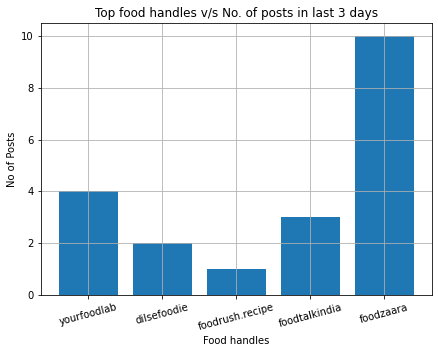

In [160]:
import matplotlib.pyplot as plt

plt.figure( figsize=(7, 5))
plt.grid()
plt.bar(keys, values)
plt.xticks(rotation = 15)
plt.title('Top food handles v/s No. of posts in last 3 days')
plt.xlabel('Food handles')
plt.ylabel('No of Posts')
plt.show()

# 2.1, 2.2 Hashtags used in recent 10 posts of each top handle and their frequency


In [84]:
def hashtags_posts():
    
    hashtag={}
    for j in posts:
        open_profile(j)
        time.sleep(5)
        count=0
        try:
            #clicking on the first post
            post=driver.find_element_by_class_name("_9AhH0")
            post.click()
            time.sleep(4)
            count=1

            while count<10:
                #extracting each hashtag
                h=driver.find_elements_by_xpath("//div[contains(@class,'C4VMK')]//span/a")
                for i in h:
                    x=i.text

                    #creating a dictionary of hashtags and their frequency
                    if '#' in x:
                        hashtag[x]=hashtag.get(x,0)+1

                # clicking on next button to go to next post
                next_button = driver.find_element_by_class_name('_65Bje') 
                next_button.click()
                time.sleep(5)
                count=count+1
   
        except NoSuchElementException: 
            continue
            
    return hashtag

In [121]:
hashtags=hashtags_posts()

In [123]:
hashtags

{'#MorphyRichards': 2,
 '#CookItMyWay': 4,
 '#recipes': 3,
 '#idli': 2,
 '#idlilove': 1,
 '#southindianfood': 2,
 '#southindian': 2,
 '#foodporn': 15,
 '#foodies': 1,
 '#streetfood': 8,
 '#streetstyle': 5,
 '#indiancuisine': 6,
 '#recipe': 9,
 '#recipeoftheday': 3,
 '#masala': 2,
 '#mumbaistreetfood': 2,
 '#fooddaily': 1,
 '#yourfoodtographer': 1,
 '#sanjyotkeer': 4,
 '#instadaily': 9,
 '#foodie': 11,
 '#comfortfood': 3,
 '#food': 10,
 '#bhindimasala': 1,
 '#palak': 1,
 '#paneer': 4,
 '#rajma': 2,
 '#foodphotography': 2,
 '#easyrecipes': 1,
 '#palakpaneer': 1,
 '#paneerrecipes': 1,
 '#foodstagram': 3,
 '#mumbai': 7,
 '#foodpics': 1,
 '#instagram': 2,
 '#instafood': 4,
 '#cinematography': 1,
 '#anda': 1,
 '#dilsefoodie': 9,
 '#southdelhi': 1,
 '#gk1': 1,
 '#delhitovrindavan': 1,
 '#Onedaytrip': 1,
 '#MadhurSugar': 1,
 '#MadhurMithaas': 1,
 '#MadhurDiwali': 1,
 '#DiwaliUtsav': 1,
 '#LooseNahiMadhurSahi': 1,
 '#Diwali': 1,
 '#Sweets': 1,
 '#DiwaliSweets': 1,
 '#5SGuarantee': 1,
 '#Kalakan

In [124]:
#sorting the hashtags wrt to their frequency in descending order
sorted_hash = sorted(hashtags.items(), key = lambda kv:kv[1], reverse = True)
sorted_hash

[('#foodporn', 15),
 ('#foodie', 11),
 ('#food', 10),
 ('#recipe', 9),
 ('#instadaily', 9),
 ('#dilsefoodie', 9),
 ('#foodzaara', 9),
 ('#delhi', 9),
 ('#streetfood', 8),
 ('#instagood', 8),
 ('#pune', 8),
 ('#mumbaikar', 8),
 ('#mumbai', 7),
 ('#kolkata', 7),
 ('#indiancuisine', 6),
 ('#traveling', 6),
 ('#mumbaidiaries', 6),
 ('#zingyzest', 6),
 ('#streetstyle', 5),
 ('#indian', 5),
 ('#HendricksMidsummer', 5),
 ('#latepost', 5),
 ('#explore', 5),
 ('#nomnom', 5),
 ('#instamood', 5),
 ('#CookItMyWay', 4),
 ('#sanjyotkeer', 4),
 ('#paneer', 4),
 ('#instafood', 4),
 ('#india', 4),
 ('#awesome', 4),
 ('#delhigram', 4),
 ('#delhidiaries', 4),
 ('#quarantine', 4),
 ('#lifestyle', 4),
 ('#loveislove', 4),
 ('#recipes', 3),
 ('#recipeoftheday', 3),
 ('#comfortfood', 3),
 ('#foodstagram', 3),
 ('#diwali', 3),
 ('#dessert', 3),
 ('#foodblogger', 3),
 ('#homemade', 3),
 ('#cheese', 3),
 ('#HendricksGin', 3),
 ('#best', 3),
 ('#positivevibes', 3),
 ('#omg', 3),
 ('#mood', 3),
 ('#chennai', 3),


# 2.3 Saving hashtags in CSV file


In [126]:
import pandas as pd
#creating a dataframe
df = pd.DataFrame(sorted_hash, columns=['Word','Frequency'])

In [127]:
df

,Word,Frequency
0,#foodporn,15
1,#foodie,11
2,#food,10
3,#recipe,9
4,#instadaily,9
...,...,...
241,#thankyou,1
242,#delhiblogger,1
243,#photographylovers,1
244,#want,1


In [129]:
hashtags_csv=df.to_csv('frequency_hashtags.csv', index = False )

# 2.4 , 2.5 Most popular hashtags

In [130]:
c=0
for ind in df.index:
    if c<10:
        h=df["Word"][ind]
        f=df['Frequency'][ind]
        print(h," : ",f)
        c=c+1

#foodporn  :  15
#foodie  :  11
#food  :  10
#recipe  :  9
#instadaily  :  9
#dilsefoodie  :  9
#foodzaara  :  9
#delhi  :  9
#streetfood  :  8
#instagood  :  8


In [161]:
#creating lists
c=0
word=[]
fr=[]
for ind in df.index:
    if c<5:
        h=df["Word"][ind]
        f=df['Frequency'][ind]
        word.append(h)
        fr.append(f)
        c=c+1

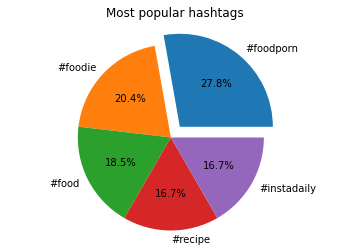

In [162]:
sizes=fr
labels=word
explode=[0.15,0,0,0,0]
plt.pie(sizes,labels=labels,explode=explode,autopct="%.1f%%") #or pass a function in 
plt.title("Most popular hashtags")
plt.axis("equal")
plt.show()

# 3.1 Likes of the top 10 posts of the 5 handles obtained earlier

<br>(except private accounts not followed by you)

In [75]:
def likes_posts():
    likes_handle={}
    for j in five:
        open_profile(j)
        time.sleep(5)
        count=1
        print(j)
        
        try:
            post=driver.find_element_by_class_name("_9AhH0")
            post.click()
            time.sleep(4)
        
#         for private accounts or handles with 0 posts
        except NoSuchElementException: 
            continue

        while count<=10:

            try:
                views=driver.find_element_by_class_name("vcOH2")
                views.click()
                l=driver.find_element_by_class_name("vJRqr").text
                ls=l.split(" ")[0]
                like=int(ls.replace(",",""))
                driver.find_element_by_class_name("QhbhU").click()



            except NoSuchElementException:
                bt=driver.find_element_by_xpath("//div[contains(@class,'Nm9Fw')]//button/span").text
                like=int(bt.replace(",",""))
            print(like)
            likes_handle[j]=likes_handle.get(j,0)+ like
            
            try:
                next_button = driver.find_element_by_class_name('_65Bje') # clicking on next button to go to next post
                next_button.click()
                time.sleep(5)
            
#             for handles with less than 10 posts
            except NoSuchElementException:
                break
            
            count=count+1
    return likes_handle

In [144]:
likes=likes_posts()

yourfoodlab
20740
18273
22985
25184
22199
28964
17081
25034
22493
26213
dilsefoodie
22319
9560
3605
28594
12153
3367
9322
8565
10610
7905
foodrush.recipe
7752
16650
74423
8731
6811
12068
19502
11405
43780
42203
foodtalkindia
367
299
159
424
575
714
723
1358
257
154
foodzaara
2015
7801
2462
3392
3299
4269
2897
3230
4680
5658


# 3.2 Average likes for each handle

In [145]:
#total likes for each handle
likes_handle

{'yourfoodlab': 228775,
 'dilsefoodie': 115567,
 'foodrush.recipe': 243182,
 'foodtalkindia': 5025,
 'foodzaara': 39528}

In [146]:
avg_likes=[]
handles=[]
for i,j in likes_handle.items():
    av=j/10
    print(i," :  ",av)
    avg_likes.append(j)
    handles.append(i)

yourfoodlab  :   22877.5
dilsefoodie  :   11556.7
foodrush.recipe  :   24318.2
foodtalkindia  :   502.5
foodzaara  :   3952.8


# 3.3, 3.4 Followers: Average likes ratio for top handles

In [147]:
five_followers=[]
for i,j in sorted_top:
    five_followers.append(j)

In [148]:
ratio=[]
for i in range(5):
    r=five_followers[i]/avg_likes[i]
    ratio.append(r)
    print(handles[i]," : ",r)

yourfoodlab  :  6.36671839143263
dilsefoodie  :  5.665691763219604
foodrush.recipe  :  2.585935636683636
foodtalkindia  :  60.25134328358209
foodzaara  :  3.8434780408824123


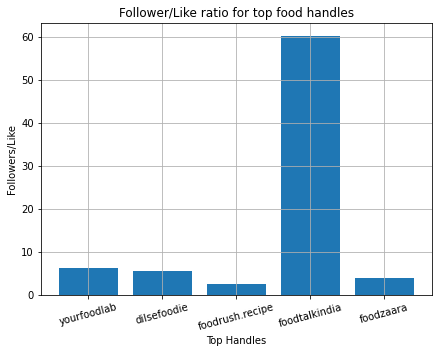

In [163]:
import matplotlib.pyplot as plt

plt.figure( figsize=(7, 5))
plt.bar(handles,ratio)
plt.grid()
plt.title("Follower/Like ratio for top food handles")
plt.xlabel("Top Handles")
plt.ylabel("Followers/Like")
plt.xticks(rotation=15)
plt.show()

